In [ ]:
#變數設定
s=float(input("標的資產價格"))
k=float(input("履約價格"))
r=float(input("利率"))
t=int(input("至到期日的天數"))/365
sigma=float(input("標準差"))

In [38]:
#計算部分
import numpy as np
from numpy import log as ln  #方便用natural log
d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
d2=(ln(s/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))

In [ ]:
d1

In [26]:
from scipy.stats import norm
import math
#norm.cdf(d1)
def dn(d):
    dn_d=math.exp((-0.5)*d**2)/(np.sqrt(2*np.pi))
    dn_d=float(dn_d)
    return dn_d
#implicit volatility需要
def f(sigma):
    d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2=(ln(s/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    c=s*norm.cdf(d1)-k*math.exp(-r*t)*norm.cdf(d2)
    return c

In [34]:
#5 greeks的值(europe call)
import math
delta=norm.cdf(d1)
gamma=dn(d1)/(s*sigma*t**0.5)
vega=s*t**0.5**dn(d1)
theta=-((k*dn(d1)*sigma/(2*t**0.5))+r*k*math.exp(-r*t)*norm.cdf(d2))
rho=t*k*math.exp(-r*t)*norm.cdf(d2)

In [35]:
c=s*norm.cdf(d1)-k*math.exp(-r*t)*norm.cdf(d2)
c

22.213152347063122

In [39]:
p=k*math.exp(-r*t)*norm.cdf(-d2)-s*norm.cdf(-d1)
p

20.094799169438843

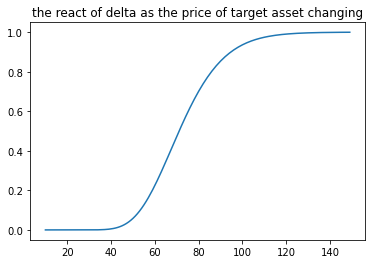

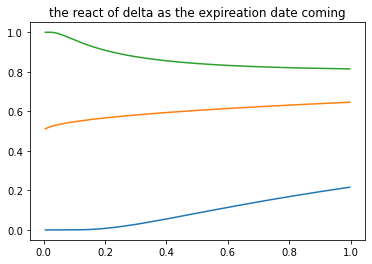

In [22]:
#delta
import matplotlib.pyplot as plt#畫圖
#delta隨標的資產價格的變化
t=150/365
s_delta_s=[]
s_delta=[]
for i in range(10,150):
    s=i
    d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    delta=norm.cdf(d1)
    s_delta.append(delta)
    s_delta_s.append(s)
plt.plot(s_delta_s,s_delta)
plt.title("the react of delta as the price of target asset changing")
plt.savefig('delta_s.png')
plt.show()
#delta隨到期時間的變化
t_delta_t=[]
t_delta_in=[]
t_delta_at=[]
t_delta_out=[]
for i in range(2,365):
    s_in=50
    s_at=75
    s_out=90
    t=i/365
    d1_in=(ln(s_in/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_at=(ln(s_at/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_out=(ln(s_out/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    t_delta_in.append(norm.cdf(d1_in))
    t_delta_at.append(norm.cdf(d1_at))
    t_delta_out.append(norm.cdf(d1_out))
    t_delta_t.append(t)
plt.plot(t_delta_t,t_delta_in)
plt.plot(t_delta_t,t_delta_at)
plt.plot(t_delta_t,t_delta_out)
plt.title("the react of delta as the expireation date coming")
plt.savefig('delta_t.png')
plt.show()

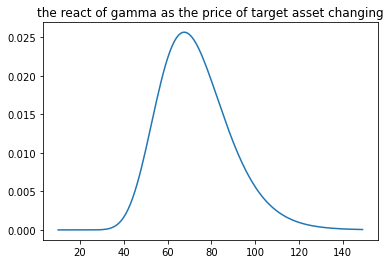

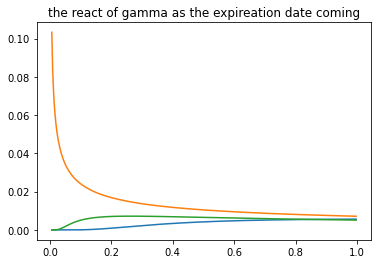

In [23]:
#gamma
import matplotlib.pyplot as plt#畫圖
#gamma隨標的資產價格的變化
t=150/365
s_gamma_s=[]
s_gamma=[]
for i in range(10,150):
    s=i
    d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    gamma=dn(d1)/(s*sigma*t**0.5)
    s_gamma.append(gamma)
    s_gamma_s.append(s)
plt.plot(s_gamma_s,s_gamma)
plt.title("the react of gamma as the price of target asset changing")
plt.savefig('gamma_s.png')
plt.show()
#gamma隨到期時間的變化
t_gamma_t=[]
t_gamma_in=[]
t_gamma_at=[]
t_gamma_out=[]
for i in range(2,365):
    s_in=50
    s_at=75
    s_out=90
    t=i/365
    d1_in=(ln(s_in/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_at=(ln(s_at/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_out=(ln(s_out/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    t_gamma_in.append(dn(d1_in)/(s*sigma*t**0.5))
    t_gamma_at.append(dn(d1_at)/(s*sigma*t**0.5))
    t_gamma_out.append(dn(d1_out)/(s*sigma*t**0.5))
    t_gamma_t.append(t)
plt.plot(t_gamma_t,t_gamma_in)
plt.plot(t_gamma_t,t_gamma_at)
plt.plot(t_gamma_t,t_gamma_out)
plt.title("the react of gamma as the expireation date coming")
plt.savefig('gamma_t.png')
plt.show()

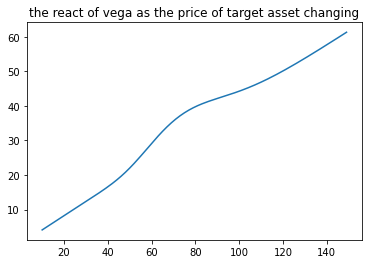

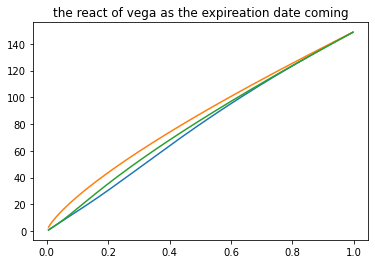

In [24]:
#vega
import matplotlib.pyplot as plt#畫圖
#vega隨標的資產價格的變化
t=150/365
s_vega_s=[]
s_vega=[]
for i in range(10,150):
    s=i
    d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    vega=s*t**0.5**dn(d1)
    s_vega.append(vega)
    s_vega_s.append(s)
plt.plot(s_vega_s,s_vega)
plt.title("the react of vega as the price of target asset changing")
plt.savefig('vega_s.png')
plt.show()
#vega隨到期時間的變化
t_vega_t=[]
t_vega_in=[]
t_vega_at=[]
t_vega_out=[]
for i in range(2,365):
    s_in=50
    s_at=75
    s_out=90
    t=i/365
    d1_in=(ln(s_in/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_at=(ln(s_at/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_out=(ln(s_out/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    t_vega_in.append(s*t**0.5**dn(d1_in))
    t_vega_at.append(s*t**0.5**dn(d1_at))
    t_vega_out.append(s*t**0.5**dn(d1_out))
    t_vega_t.append(t)
plt.plot(t_vega_t,t_vega_in)
plt.plot(t_vega_t,t_vega_at)
plt.plot(t_vega_t,t_vega_out)
plt.title("the react of vega as the expireation date coming")
plt.savefig('vega_t.png')
plt.show()

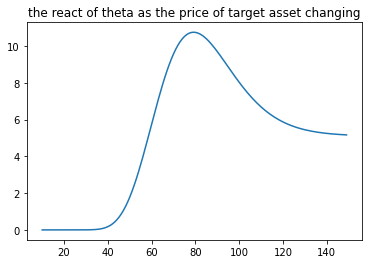

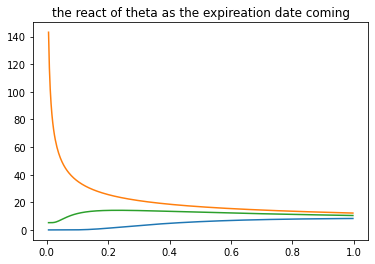

In [25]:
#theta
import math
import matplotlib.pyplot as plt#畫圖
#theta隨標的資產價格的變化
t=150/365
s_theta_s=[]
s_theta=[]
for i in range(10,150):
    s=i
    d1=(ln(s/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2=(ln(s/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    theta=(s*dn(d1)*sigma/(2*t**0.5))+r*k*math.exp(-r*t)*norm.cdf(d2)
    s_theta.append(theta)
    s_theta_s.append(s)
plt.plot(s_theta_s,s_theta)
plt.title("the react of theta as the price of target asset changing")
plt.savefig('theta_s.png')
plt.show()
#theta隨到期時間的變化
t_theta_t=[]
t_theta_in=[]
t_theta_at=[]
t_theta_out=[]
for i in range(2,365):
    s_in=50
    s_at=75
    s_out=90
    t=i/365
    d1_in=(ln(s_in/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_at=(ln(s_at/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d1_out=(ln(s_out/k)+(r+(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2_in=(ln(s_in/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2_at=(ln(s_at/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2_out=(ln(s_out/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    t_theta_in.append(s*dn(d1_in)*sigma/(2*t**0.5)+r*k*math.exp(-r*t)*norm.cdf(d2_in))
    t_theta_at.append(s*dn(d1_at)*sigma/(2*t**0.5)+r*k*math.exp(-r*t)*norm.cdf(d2_at))
    t_theta_out.append(s*dn(d1_out)*sigma/(2*t**0.5)+r*k*math.exp(-r*t)*norm.cdf(d2_out))
    t_theta_t.append(t)
plt.plot(t_theta_t,t_theta_in)
plt.plot(t_theta_t,t_theta_at)
plt.plot(t_theta_t,t_theta_out)
plt.title("the react of theta as the expireation date coming")
plt.savefig('theta_t.png')
plt.show()

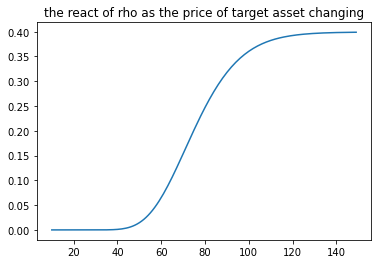

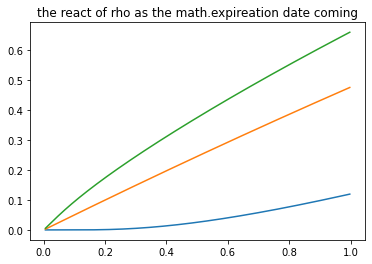

In [26]:
#rho
import math
import matplotlib.pyplot as plt#畫圖
#rho隨標的資產價格的變化
t=150/365
s_rho_s=[]
s_rho=[]
for i in range(10,150):
    s=i
    d2=(ln(s/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    rho=t*math.exp(-r*t)*norm.cdf(d2)
    s_rho.append(rho)
    s_rho_s.append(s)
plt.plot(s_rho_s,s_rho)
plt.title("the react of rho as the price of target asset changing")
plt.savefig('rho_s.png')
plt.show()
#rho隨到期時間的變化
t_rho_t=[]
t_rho_in=[]
t_rho_at=[]
t_rho_out=[]
for i in range(2,365):
    s_in=50
    s_at=75
    s_out=90
    t=i/365
    d2_in=(ln(s_in/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2_at=(ln(s_at/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    d2_out=(ln(s_out/k)+(r-(sigma**2)/2)*t)/(sigma*(t**0.5))
    t_rho_in.append(t*math.exp(-r*t)*norm.cdf(d2_in))
    t_rho_at.append(t*math.exp(-r*t)*norm.cdf(d2_at))
    t_rho_out.append(t*math.exp(-r*t)*norm.cdf(d2_out))
    t_rho_t.append(t)
plt.plot(t_rho_t,t_rho_in)
plt.plot(t_rho_t,t_rho_at)
plt.plot(t_rho_t,t_rho_out)
plt.title("the react of rho as the math.expireation date coming")
plt.savefig('rho_t.png')
plt.show()

In [43]:
#可刪除
#網上做法
!pip install mibian
import mibian
!pip install tabulate
from tabulate import tabulate

stock_price=18141
strick_price=18050
interest_rate=10
day_to_expiry=1
volatility=14

print(tabulate([['Delta',greeks.putDelta],
               ['Gamma',greeks.gamma],
               ['Vega',greeks.vega],
               ['Theta',greeks.putTheta],
               ['Rho',greeks.putRho]
               ],headers=['Greeks','Value'],
tablefmt='orgtbl'))
print("")
print('The put price is',greeks.putPrice)

NameError: name 'greeks' is not defined

In [6]:
#可刪除
#微分與積分
import math #用於積分
from sympy import *                                                                                             
x = symbols('x')
def n(d):
    n_d=integrate(exp((-0.5)*x**2), (x,-oo,d))/(np.sqrt(2*np.pi))
    n_d=float(n_d)
    return n_d 
def dn(d):
    dn_d=exp((-0.5)*d**2)/(np.sqrt(2*np.pi))
    dn_d=float(dn_d)
    return dn_d
#n_d1=integrate(exp((-0.5)*x**2), (x,-oo,d1))/(np.sqrt(2*np.pi))
#n_d2=integrate(exp((-0.5)*x**2), (x,-oo,d2))/(np.sqrt(2*np.pi))
#dn_d1=exp((-0.5)*d1**2)/(np.sqrt(2*np.pi))
#dn_d2=exp((-0.5)*d2**2)/(np.sqrt(2*np.pi))